In [354]:
import pandas as pd
import numpy as np
import seaborn as sns

## Analyzing food/housing nonprofit tweets

In [355]:
users = pd.read_csv('user_tweets.csv')
users

,2020-09-16 16:51:46,Amazon Smile has donated over $200 million to charities worldwide! You can help increase @amazonsmile donations to St. Paul's Community Development Corporation (SPCDC) by shopping at https://t.co/I0aZBSLoPL or with AmazonSmile ON in the Amazon Shopping app. #ShopToday https://t.co/VT7crnQMWD,Unnamed: 2,stpaulscdcnj
0,2020-09-06 14:31:07,“A shadow of hunger looms over the United Stat...,NaN,stpaulscdcnj
1,2020-09-05 16:58:26,The SPCDC Food Pantry remains open Monday thro...,NaN,stpaulscdcnj
2,2020-09-05 16:58:25,"During the month of August, the SPCDC Food Pan...",NaN,stpaulscdcnj
3,2020-09-05 16:58:25,"Imagine what your reaction might be if, throug...",NaN,stpaulscdcnj
4,2020-09-05 16:58:23,"And once processed, the enhanced unemployment ...",NaN,stpaulscdcnj
...,...,...,...,...
17602,2019-03-11 12:35:52,Dueling Dems Murphy and Sweeney reach deal on ...,NaN,HCDNNJ
17603,2019-03-08 20:01:30,RT @MatthewBHersh: Housing is so important to ...,NaN,HCDNNJ
17604,2019-03-05 20:36:20,"To put into context: Last year, the Real Estat...",NaN,HCDNNJ
17605,2019-03-05 19:41:20,Statement from @HCDNNJ's @staciberger: Big Boo...,NaN,HCDNNJ


In [356]:
x = list(users.columns)

In [357]:
new_header = ['time', 'content','location', 'account']

In [358]:
users.columns = new_header

In [359]:
users

,time,content,location,account
0,2020-09-06 14:31:07,“A shadow of hunger looms over the United Stat...,NaN,stpaulscdcnj
1,2020-09-05 16:58:26,The SPCDC Food Pantry remains open Monday thro...,NaN,stpaulscdcnj
2,2020-09-05 16:58:25,"During the month of August, the SPCDC Food Pan...",NaN,stpaulscdcnj
3,2020-09-05 16:58:25,"Imagine what your reaction might be if, throug...",NaN,stpaulscdcnj
4,2020-09-05 16:58:23,"And once processed, the enhanced unemployment ...",NaN,stpaulscdcnj
...,...,...,...,...
17602,2019-03-11 12:35:52,Dueling Dems Murphy and Sweeney reach deal on ...,NaN,HCDNNJ
17603,2019-03-08 20:01:30,RT @MatthewBHersh: Housing is so important to ...,NaN,HCDNNJ
17604,2019-03-05 20:36:20,"To put into context: Last year, the Real Estat...",NaN,HCDNNJ
17605,2019-03-05 19:41:20,Statement from @HCDNNJ's @staciberger: Big Boo...,NaN,HCDNNJ


In [360]:
users.content = users.content.str.lower()

In [361]:
users = users

In [362]:
np.unique(users.account)

array(['CUMACFeeds', 'EvasVillageNJ', 'HCDNNJ', 'NNJFairHousing', 'NNJLS',
       'OasisPatersonNJ', 'PatersonHabitat', 'TableToTableOrg',
       'stpaulscdcnj', 'zellieimani'], dtype=object)

### Exploring HCDNNJ account

In [363]:
hcd = current1[current1.account == 'HCDNNJ']
hcd

,time,content,location,account
16847,2020-09-24 22:11:47,rt @staciberger: thanks to @njstandupspeak for...,NaN,HCDNNJ
16848,2020-09-24 18:43:43,"as sandy survivors, we have experienced the wo...",NaN,HCDNNJ
16849,2020-09-24 18:39:16,#drivetosurvive presses nj senate to pass mean...,NaN,HCDNNJ
16850,2020-09-24 15:57:34,rt @njstandupspeak: we’re here in trenton with...,NaN,HCDNNJ
16851,2020-09-24 15:57:24,rt @njcitizenaction: #thepeoplesbill helps ten...,NaN,HCDNNJ
...,...,...,...,...
17330,2020-01-13 21:52:02,@joebiden we look forward to hearing more abou...,NaN,HCDNNJ
17331,2020-01-13 21:02:34,@amyklobuchar we want to hear more about your ...,NaN,HCDNNJ
17332,2020-01-13 21:02:04,"@ewarren over 1,000 organizations want to hear...",NaN,HCDNNJ
17333,2020-01-09 16:26:36,rt @hcdnnj: take action to strengthen code blu...,NaN,HCDNNJ


In [364]:
pat = r'\b(?:{})\b'.format('|'.join(stop_words))
hcd['tweet_without_stopwords'] = hcd['content'].str.replace(pat, '')
hcd['tweet_without_stopwords'] = hcd['content'].str.replace(r'\s+', ' ')

<ipython-input-364-6fc1de829a31>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hcd['tweet_without_stopwords'] = hcd['content'].str.replace(pat, '')
<ipython-input-364-6fc1de829a31>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hcd['tweet_without_stopwords'] = hcd['content'].str.replace(r'\s+', ' ')


In [365]:
from collections import Counter
x = Counter(" ".join(hcd["tweet_without_stopwords"]).split()).most_common(100)
x

[('to', 429),
 ('rt', 301),
 ('the', 281),
 ('in', 200),
 ('and', 196),
 ('a', 151),
 ('of', 149),
 ('for', 132),
 ('is', 130),
 ('their', 103),
 ('&amp;', 99),
 ('on', 92),
 ('#covid19', 90),
 ('we', 79),
 ('are', 78),
 ('by', 77),
 ('keep', 74),
 ('you', 66),
 ('support', 65),
 ('people', 64),
 ('your', 61),
 ('this', 58),
 ('rent', 57),
 ('#nj', 56),
 ('@compassionatenj', 55),
 ('housing', 55),
 ('at', 55),
 ('due', 54),
 ('our', 52),
 ('pls', 49),
 ('@staciberger', 49),
 ('vote', 48),
 ('new', 44),
 ('@staciberger:', 40),
 ('homes!', 40),
 ('will', 39),
 ('an', 38),
 ('post', 38),
 ('@nlihc:', 37),
 ('that', 36),
 ('during', 36),
 ('#housingishealth', 36),
 ('@njsenatepres', 35),
 ('ask', 35),
 ('a4226/a4034', 35),
 ('nj.', 34),
 ('sponsored', 34),
 ('set', 34),
 ('as', 33),
 ('from', 33),
 ('homes', 33),
 ('mortgage', 33),
 ('@hcdnnj', 32),
 ('have', 32),
 ('help', 32),
 ('a4034/s2340', 32),
 ('forbearance', 32),
 ('nj', 31),
 ('4', 31),
 ('expire', 31),
 ('+', 30),
 ('families', 

In [366]:
y = []

In [367]:
y.append(x[3][0])
y

['in']

In [368]:
len(x)

100

In [369]:
lst = []

for i in np.arange(100):
    if (x[i][0] not in stop_words):
        lst.append(x[i][0])

#### contains most popular words in HCDNNJ tweets

In [370]:
lst

['&amp;',
 '#covid19',
 'keep',
 'support',
 'people',
 'rent',
 '#nj',
 '@compassionatenj',
 'housing',
 'due',
 'pls',
 '@staciberger',
 'vote',
 'new',
 '@staciberger:',
 'homes!',
 'post',
 '@nlihc:',
 '#housingishealth',
 '@njsenatepres',
 'ask',
 'a4226/a4034',
 'nj.',
 'sponsored',
 'set',
 'homes',
 'mortgage',
 '@hcdnnj',
 'help',
 'a4034/s2340',
 'forbearance',
 'nj',
 '4',
 'expire',
 '+',
 'families',
 'today',
 'residents',
 'emergency',
 '@njdca:',
 'health',
 'need',
 '@govmurphy:',
 'make',
 'eviction',
 'bill',
 'pandemic',
 'state',
 'jersey',
 'thank',
 'relief',
 'next',
 '@dianeyentel:',
 '#covid19.',
 'ppl',
 'pandemic.',
 'renters',
 'protect',
 'tell',
 'call',
 'evictions',
 'many',
 '1']

### Exploring Eva's Village Account

In [371]:
current1 = users[users['time'] > '2020-01-01 00:00:00']
eva = current1[current1.account == 'EvasVillageNJ']
eva

,time,content,location,account
6331,2020-09-25 14:01:03,alumns give back: gwen debenedetto of the vill...,NaN,EvasVillageNJ
6332,2020-09-24 16:23:02,we're more than a third to our goal thanks to ...,NaN,EvasVillageNJ
6333,2020-09-24 15:00:13,refreshing donation: shout out to gavin and al...,NaN,EvasVillageNJ
6334,2020-09-23 16:48:15,we are pleased to welcome @wholefoods to nearb...,NaN,EvasVillageNJ
6335,2020-09-22 16:25:39,help us fight hunger! the @nygiants will match...,NaN,EvasVillageNJ
...,...,...,...,...
6489,2020-03-11 14:05:29,we've partnered with the @njwindsymphony to ho...,NaN,EvasVillageNJ
6490,2020-02-14 14:31:07,happy valentine's day! - we'd like to share a ...,NaN,EvasVillageNJ
6491,2020-01-22 14:00:02,stories from our community: voices of the vill...,NaN,EvasVillageNJ
6492,2020-01-19 16:02:03,stories from our community: voices of the vill...,NaN,EvasVillageNJ


In [372]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/NancyXu/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [555]:
from nltk.corpus import stopwords
stop_words = stopwords.words('english')



In [374]:
pat = r'\b(?:{})\b'.format('|'.join(stop_words))
eva['tweet_without_stopwords'] = eva['content'].str.replace(pat, '')
eva['tweet_without_stopwords'] = eva['content'].str.replace(r'\s+', ' ')

<ipython-input-374-c0047ea881c9>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  eva['tweet_without_stopwords'] = eva['content'].str.replace(pat, '')
<ipython-input-374-c0047ea881c9>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  eva['tweet_without_stopwords'] = eva['content'].str.replace(r'\s+', ' ')


In [375]:
eva

,time,content,location,account,tweet_without_stopwords
6331,2020-09-25 14:01:03,alumns give back: gwen debenedetto of the vill...,NaN,EvasVillageNJ,alumns give back: gwen debenedetto of the vill...
6332,2020-09-24 16:23:02,we're more than a third to our goal thanks to ...,NaN,EvasVillageNJ,we're more than a third to our goal thanks to ...
6333,2020-09-24 15:00:13,refreshing donation: shout out to gavin and al...,NaN,EvasVillageNJ,refreshing donation: shout out to gavin and al...
6334,2020-09-23 16:48:15,we are pleased to welcome @wholefoods to nearb...,NaN,EvasVillageNJ,we are pleased to welcome @wholefoods to nearb...
6335,2020-09-22 16:25:39,help us fight hunger! the @nygiants will match...,NaN,EvasVillageNJ,help us fight hunger! the @nygiants will match...
...,...,...,...,...,...
6489,2020-03-11 14:05:29,we've partnered with the @njwindsymphony to ho...,NaN,EvasVillageNJ,we've partnered with the @njwindsymphony to ho...
6490,2020-02-14 14:31:07,happy valentine's day! - we'd like to share a ...,NaN,EvasVillageNJ,happy valentine's day! - we'd like to share a ...
6491,2020-01-22 14:00:02,stories from our community: voices of the vill...,NaN,EvasVillageNJ,stories from our community: voices of the vill...
6492,2020-01-19 16:02:03,stories from our community: voices of the vill...,NaN,EvasVillageNJ,stories from our community: voices of the vill...


In [376]:
from collections import Counter
t = Counter(" ".join(eva["tweet_without_stopwords"]).split()).most_common(100)

#### contains most popular words in eva's village

In [377]:
lst2 = []

for i in np.arange(100):
    if (t[i][0] not in stop_words):
        lst2.append(t[i][0])
        
lst2

['#teamevas',
 'community',
 'thank',
 "eva's",
 '#covid19',
 'us',
 'meals',
 'help',
 'covid-19',
 'donation',
 'people',
 'kitchen',
 'recovery',
 'halfway',
 'donated',
 'village',
 'p.m.',
 'food',
 "we're",
 '-',
 '#feedthehungry',
 '#covidkindness',
 'to-go',
 'st.',
 'clients',
 '#hopeatevas',
 'main',
 'members',
 'support',
 'eva’s',
 'like',
 'pandemic.',
 'need',
 '393',
 'volunteer',
 'house',
 'new',
 'day',
 'shelter',
 'lunches',
 '#togetherblue',
 '#recovery',
 'residents',
 'chef',
 'today',
 'paterson',
 "'to",
 "go'",
 '&amp;',
 'water',
 'please',
 'continue',
 'weekdays',
 'still',
 'make',
 'come',
 'noon',
 '1',
 'director']

In [378]:
evaPaterson = eva[eva.content.str.contains('paterson')]

In [379]:
from collections import Counter
p = Counter(" ".join(evaPaterson["tweet_without_stopwords"]).split()).most_common(100)

In [380]:
## list of most frequent words in eva's village tweets
lst3 = []

for i in np.arange(100):
    if (p[i][0] not in stop_words):
        lst3.append(p[i][0])
        
lst3

['paterson',
 'meals',
 'community',
 'us',
 'to-go',
 '#teamevas',
 '#feedthehungry',
 'paterson,',
 '393',
 'main',
 'thank',
 "we're",
 'food',
 'lunches',
 'said',
 'like',
 'others',
 'p.m.',
 'st.',
 'insecurity',
 'pandemic.',
 'mayor',
 '#covid19',
 'covid-19',
 'july',
 "eva's",
 'nearly',
 'halfway',
 'residents.',
 'offering',
 'noon',
 'county',
 '#patersonstrong',
 "we've",
 'members.',
 '3',
 '11',
 'a.m.',
 'masks',
 '@holyangelsnj',
 'first',
 'lady',
 '9',
 'school',
 'juneteenth',
 'paterson.',
 'team',
 'investigated',
 'traced',
 '90',
 'percent',
 '6,000',
 'cases',
 'read',
 '@nytimes.',
 "'you",
 'kept',
 "alive,'",
 '#flattenthecurve',
 '-',
 'wipes',
 'children',
 'shelters.',
 'donated',
 'grateful',
 'donations',
 'give',
 'directly',
 'village',
 'send',
 'check',
 'st.,',
 'nj',
 '07501.']

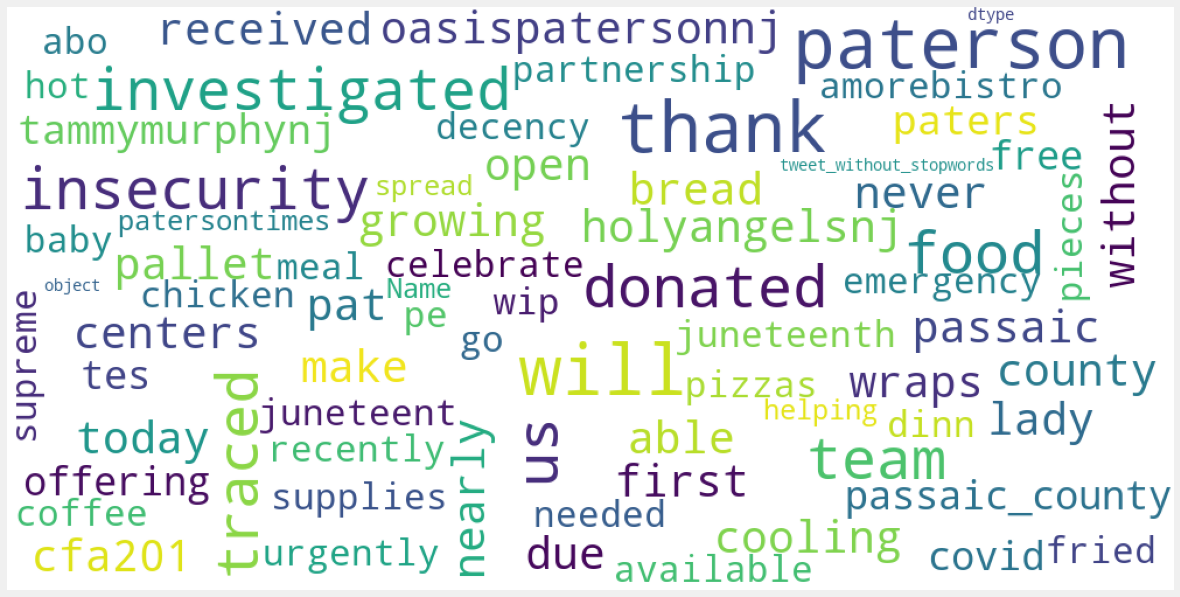

In [381]:

wordcloud = WordCloud(
                      stopwords=STOPWORDS,
                      max_font_size=60,
                      background_color='white',
                      width = 1000,
                      height = 500
                     ).generate(str(evaPaterson["tweet_without_stopwords"]))
plt.figure( figsize=(20,10) )
plt.imshow(wordcloud)
plt.axis('off')
#plt.figure(figsize=(1000,1000))
plt.show()

In [382]:
for t in eva['tweet_without_stopwords']:
    print('\n  ', t)


   alumns give back: gwen debenedetto of the villanova university alumni association club of northern new jersey dropped off a donation of groceries and toiletries wednesday. we appreciate it. thank you gwen, and thank you @villanovau alumni. #teamevas #novanation https://t.co/xxv5fudzza

   we're more than a third to our goal thanks to a $3,000 donation from george and claire kittle, who we met through the @giants. thank you! https://t.co/4co8fzpeqn @eazyengram @alexbachman @allforgod_55 @ajohn15 @chadslade62 @carsontink @kylemurphy68 @ryanlewis_38 https://t.co/85pltstnnw

   refreshing donation: shout out to gavin and alex, glen rock high school students, who collected and delivered 85 cases of water and funds for our community kitchen last week. we appreciate their efforts. gavin and alex are shown with eva's staff. #teamevas #fighthunger https://t.co/wtjju7gp70

   we are pleased to welcome @wholefoods to nearby wayne. the store opened a few days ago, and we are honored to be name

In [383]:
#feedthehungry #patersonstrong

In [384]:
hashtags = ['Evictions',
                    'Homelessness',
                    'Homeless',
                    'Tenants',
                    'AffordableHousing',
                    'CancelRent',
                    'RentStrike',
                    'TaxTheRich',
                    'EvictionMoratorium',
                    'RentMoratorium',
                    'EvictionFree',
                    'NoEvictions',
                    'Housing assistance',
                    'Housingrelief',
                    #'COVID19',
                    'Rentstrike',
                    'Housingcrisis',
                    'Rentburden',
                    'HousingForAll',
                    'Evictionfreeze',
                    'HousingAffordability',
                    'EquitableDevelopment',
                    'Unemployment',
                    'Foreclosure',
                    'SuspendRent',
                    'RentFreeze',
                    'Displacement',
                    'RentalAssistance',
                    'localfoodbank',
                    'foodbank',
                    'fooddrive',
                    'endhunger',
            'feedthehungry','patersonstrong','HousingIsHealth'
           ]

In [385]:
lowered=[x.lower() for x in hashtags]
lowered.append('evict')
lowered

['evictions',
 'homelessness',
 'homeless',
 'tenants',
 'affordablehousing',
 'cancelrent',
 'rentstrike',
 'taxtherich',
 'evictionmoratorium',
 'rentmoratorium',
 'evictionfree',
 'noevictions',
 'housing assistance',
 'housingrelief',
 'rentstrike',
 'housingcrisis',
 'rentburden',
 'housingforall',
 'evictionfreeze',
 'housingaffordability',
 'equitabledevelopment',
 'unemployment',
 'foreclosure',
 'suspendrent',
 'rentfreeze',
 'displacement',
 'rentalassistance',
 'localfoodbank',
 'foodbank',
 'fooddrive',
 'endhunger',
 'feedthehungry',
 'patersonstrong',
 'housingishealth',
 'evict']

In [386]:
users.content.str.split()

0        [“a, shadow, of, hunger, looms, over, the, uni...
1        [the, spcdc, food, pantry, remains, open, mond...
2        [during, the, month, of, august,, the, spcdc, ...
3        [imagine, what, your, reaction, might, be, if,...
4        [and, once, processed,, the, enhanced, unemplo...
                               ...                        
17602    [dueling, dems, murphy, and, sweeney, reach, d...
17603    [rt, @matthewbhersh:, housing, is, so, importa...
17604    [to, put, into, context:, last, year,, the, re...
17605    [statement, from, @hcdnnj's, @staciberger:, bi...
17606    [we, applaud, @govmurphy, on, fulfilling, his,...
Name: content, Length: 17607, dtype: object

In [554]:
filtered = []
for i in users.content.str.split():
    for j in lowered:
        if (j in i):
            filtered.append(i)
            


In [544]:
# lst = []
# for i in filtered:
#     lst.append("".join(i).split('\n'))
# lst

In [389]:
e = users[users.content.str.contains('evict')]
e

,time,content,location,account
2954,2019-07-04 15:05:21,"""raising children can be tough for anyone. for...",NaN,CUMACFeeds
13018,2020-09-15 03:42:12,rt @igd_news: police violently evicted and arr...,NaN,zellieimani
13029,2020-09-14 21:42:08,rt @freeblklives: i don’t have many followers ...,NaN,zellieimani
13448,2020-08-29 21:50:37,rt @zellieimani: safety doesn’t come with more...,NaN,zellieimani
14031,2020-08-10 15:07:37,"coronavirus relief favors white households, le...",NaN,zellieimani
...,...,...,...,...
17338,2019-12-13 03:10:07,thank you @senatorbennet and @senrobportman fo...,NaN,HCDNNJ
17470,2019-07-08 15:43:37,the time is now to let hud know that its propo...,NaN,HCDNNJ
17474,2019-07-08 15:13:01,"a proposal to evict over 100,000 people during...",NaN,HCDNNJ
17533,2019-05-16 19:53:00,rt @nlihc: .@secretarycarson’s unconscionable ...,NaN,HCDNNJ


In [390]:
current = e[e['time'] > '2020-01-01 00:00:00']
current

,time,content,location,account
13018,2020-09-15 03:42:12,rt @igd_news: police violently evicted and arr...,NaN,zellieimani
13029,2020-09-14 21:42:08,rt @freeblklives: i don’t have many followers ...,NaN,zellieimani
13448,2020-08-29 21:50:37,rt @zellieimani: safety doesn’t come with more...,NaN,zellieimani
14031,2020-08-10 15:07:37,"coronavirus relief favors white households, le...",NaN,zellieimani
14249,2020-07-31 03:31:47,rt @so_many_amys: we are not safe.\n\nnot from...,NaN,zellieimani
...,...,...,...,...
17280,2020-03-18 18:00:39,rt @fhfa: fhfa suspends foreclosures and evict...,NaN,HCDNNJ
17289,2020-03-15 18:39:14,#nj #housing advocates applaud #essex county m...,NaN,HCDNNJ
17293,2020-03-13 13:18:24,@hcdnnj recommendations during #covid_19 pande...,NaN,HCDNNJ
17295,2020-03-13 13:15:44,#newsrelease: #nj #housing advocates call for ...,NaN,HCDNNJ


In [391]:
w = current[current.content.str.contains('ward')]
w

,time,content,location,account
15930,2020-08-28 16:26:25,#nnjls news - august 2020 is jam-packed with i...,NaN,NNJLS
16869,2020-09-17 20:05:30,@hcdnnj awarded $1.89m to help prevent tidal ...,NaN,HCDNNJ


### Exploring zellieimani account

In [392]:
z = current[current['account'] == 'zellieimani']

In [393]:

for t in z['content']:
    print('\n  ', t)


   rt @igd_news: police violently evicted and arrested feminists who had occupied the human rights commission of the state of mexico earlier i…

   rt @freeblklives: i don’t have many followers and can only depend on rts, likes, and shares. i’m late on so many bills, about to be evicted…

   rt @zellieimani: safety doesn’t come with more police or foot patrols. you’re still not safe from eviction. you’re still not safe from fore…

   coronavirus relief favors white households, leaving many people of color at risk of being evicted https://t.co/59mkztfskf

   rt @so_many_amys: we are not safe.

not from illness
not from unemployment
not from eviction
not from deportation
&amp; certainly not from poli…

   safety doesn’t come with more police or foot patrols. you’re still not safe from eviction. you’re still not safe from foreclosure. you’re still not safe from losing your job. safety comes from equal access to resources and opportunities. #blacklivesmatter #justiceforjameek https://t.co

In [394]:
for t in current['content']:
    print('\n  ', t)


   rt @igd_news: police violently evicted and arrested feminists who had occupied the human rights commission of the state of mexico earlier i…

   rt @freeblklives: i don’t have many followers and can only depend on rts, likes, and shares. i’m late on so many bills, about to be evicted…

   rt @zellieimani: safety doesn’t come with more police or foot patrols. you’re still not safe from eviction. you’re still not safe from fore…

   coronavirus relief favors white households, leaving many people of color at risk of being evicted https://t.co/59mkztfskf

   rt @so_many_amys: we are not safe.

not from illness
not from unemployment
not from eviction
not from deportation
&amp; certainly not from poli…

   safety doesn’t come with more police or foot patrols. you’re still not safe from eviction. you’re still not safe from foreclosure. you’re still not safe from losing your job. safety comes from equal access to resources and opportunities. #blacklivesmatter #justiceforjameek https://t.co

In [395]:
current['time'].str.split('-')

13018    [2020, 09, 15 03:42:12]
13029    [2020, 09, 14 21:42:08]
13448    [2020, 08, 29 21:50:37]
14031    [2020, 08, 10 15:07:37]
14249    [2020, 07, 31 03:31:47]
                  ...           
17280    [2020, 03, 18 18:00:39]
17289    [2020, 03, 15 18:39:14]
17293    [2020, 03, 13 13:18:24]
17295    [2020, 03, 13 13:15:44]
17296    [2020, 03, 12 22:51:58]
Name: time, Length: 87, dtype: object

In [396]:
month = []
for i in list(current['time'].str.split('-')):
    month.append(i[1])
    


In [397]:
current['Month'] = month

<ipython-input-397-2d5f73d68484>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  current['Month'] = month


In [398]:
current

,time,content,location,account,Month
13018,2020-09-15 03:42:12,rt @igd_news: police violently evicted and arr...,NaN,zellieimani,09
13029,2020-09-14 21:42:08,rt @freeblklives: i don’t have many followers ...,NaN,zellieimani,09
13448,2020-08-29 21:50:37,rt @zellieimani: safety doesn’t come with more...,NaN,zellieimani,08
14031,2020-08-10 15:07:37,"coronavirus relief favors white households, le...",NaN,zellieimani,08
14249,2020-07-31 03:31:47,rt @so_many_amys: we are not safe.\n\nnot from...,NaN,zellieimani,07
...,...,...,...,...,...
17280,2020-03-18 18:00:39,rt @fhfa: fhfa suspends foreclosures and evict...,NaN,HCDNNJ,03
17289,2020-03-15 18:39:14,#nj #housing advocates applaud #essex county m...,NaN,HCDNNJ,03
17293,2020-03-13 13:18:24,@hcdnnj recommendations during #covid_19 pande...,NaN,HCDNNJ,03
17295,2020-03-13 13:15:44,#newsrelease: #nj #housing advocates call for ...,NaN,HCDNNJ,03


In [399]:
current

,time,content,location,account,Month
13018,2020-09-15 03:42:12,rt @igd_news: police violently evicted and arr...,NaN,zellieimani,09
13029,2020-09-14 21:42:08,rt @freeblklives: i don’t have many followers ...,NaN,zellieimani,09
13448,2020-08-29 21:50:37,rt @zellieimani: safety doesn’t come with more...,NaN,zellieimani,08
14031,2020-08-10 15:07:37,"coronavirus relief favors white households, le...",NaN,zellieimani,08
14249,2020-07-31 03:31:47,rt @so_many_amys: we are not safe.\n\nnot from...,NaN,zellieimani,07
...,...,...,...,...,...
17280,2020-03-18 18:00:39,rt @fhfa: fhfa suspends foreclosures and evict...,NaN,HCDNNJ,03
17289,2020-03-15 18:39:14,#nj #housing advocates applaud #essex county m...,NaN,HCDNNJ,03
17293,2020-03-13 13:18:24,@hcdnnj recommendations during #covid_19 pande...,NaN,HCDNNJ,03
17295,2020-03-13 13:15:44,#newsrelease: #nj #housing advocates call for ...,NaN,HCDNNJ,03


### Sentiment analysis of local housing/ food nonprofits by months

In [400]:
stop_words.extend(['and','of', 'are','rt','to', 'in'])

In [402]:
sent = pd.read_csv('vader_lexicon.txt',sep='\t', names=['polarity','text']).reset_index()
sent.drop(columns = ['polarity','text'], inplace = True)
sent.rename(columns={'level_0':'token','level_1':'polarity'}, inplace = True)
sent.set_index('token', inplace = True)

punct_re = r'[^\w\s]'
current['no_punc'] = current['content'].str.replace(punct_re,' ')

tidy_format = current['no_punc'].str.split(expand = True).stack().to_frame().reset_index(level = 1)
tidy_format.rename(columns={'level_1':'num',0:'word'}, inplace= True)

current['polarity']= tidy_format.reset_index().merge(sent, how = 'left',left_on = 'word', right_on = 'token').set_index('index').fillna(0).loc[:,['polarity']].groupby('index').sum().loc[:,'polarity']

<ipython-input-402-efcebb4ca86b>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  current['no_punc'] = current['content'].str.replace(punct_re,' ')
<ipython-input-402-efcebb4ca86b>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  current['polarity']= tidy_format.reset_index().merge(sent, how = 'left',left_on = 'word', right_on = 'token').set_index('index').fillna(0).loc[:,['polarity']].groupby('index').sum().loc[:,'polarity']


In [403]:
from collections import Counter
def most_common(x):
    for i in stop_words:
        if(i not in x.str.split()):
            return Counter(" ".join(x).split()).most_common(30)

grouped = current[['content','polarity','Month']].groupby('Month').agg({"polarity":"mean","content":most_common})
grouped = grouped.reset_index()
grouped

,Month,polarity,content
0,01,-2.000000,"[(90%, 2), (of, 2), (are, 2), (rt, 1), (@lsctw..."
1,03,-1.216667,"[(to, 9), (and, 8), (rt, 8), (the, 5), (evicti..."
2,04,0.633333,"[(to, 4), (rt, 3), (the, 2), (new, 2), (commun..."
3,05,-3.366667,"[(rt, 3), (the, 2), (eviction, 2), (to, 2), (n..."
4,06,0.191667,"[(to, 15), (we, 9), (evictions, 5), (eviction,..."
5,07,-0.550000,"[(rt, 10), (not, 9), (from, 9), (eviction, 5),..."
6,08,0.562500,"[(to, 6), (the, 5), (and, 5), (rt, 4), (or, 4)..."
7,09,-0.520588,"[(to, 58), (&amp;, 24), (a, 24), (in, 22), (vo..."


Text(0.5, 1.0, 'Polarity of User Tweets about Evictions by Month')

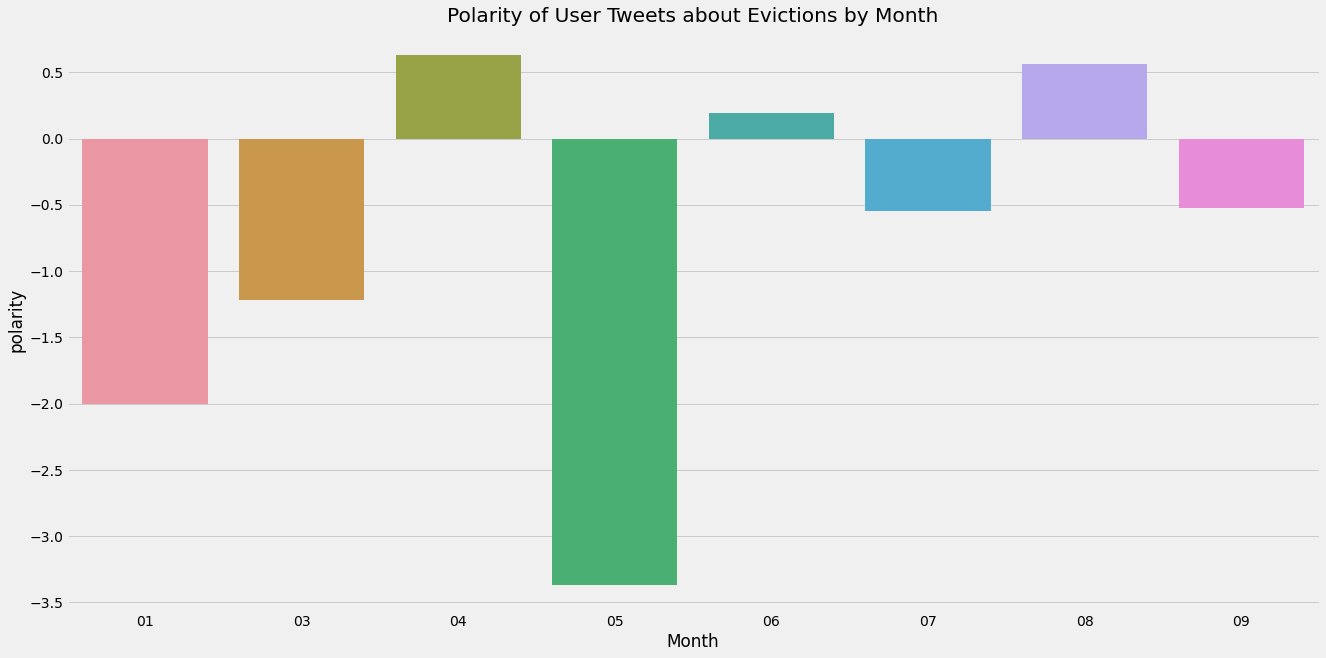

In [404]:
plt.figure( figsize=(20,10) )
sns.barplot(data = grouped, x = 'Month', y= 'polarity')
plt.title('Polarity of User Tweets about Evictions by Month')

The avg polarity of tweets and most common words grouped by each month

In [405]:
pas = current[current.content.str.contains('passaic')]
for t in pas['content']:
    print('\n  ', t)


   for tenants in #bergen, #hudson, and #passaic counties, #newjersey experiencing poverty, #nnjls provides free civil legal help with evictions, illegal lockouts, and more. contact us at (201) 792-6363 or nnjls@lsnj.org. https://t.co/d34qfppdv4

   if you live in #bergen, #hudson, or #passaic county and face an eviction or otherwise fear the loss of your housing, please contact #nnjls at (201) 792-6363 or nnjls@lsnj.org. #covid19 #a2j https://t.co/s3ynzm4sup

   please join the @passaic_county dept. of senior services and #nnjls for the 2020 passaic county housing series.  topics include reverse mortgages, foreclosures, and eviction/homelessness prevention.  call senior services at (973) 569-4060 to register. https://t.co/zuhn8ndcec


In [406]:
st = current[current.content.str.contains('home')]
for t in st['content']:
    print('\n  ', t)


   as the saying goes, “home is where the heart is” and #nnjls may be able to help you stay in yours. nnjls provides free civil legal help with evictions, foreclosures, illegal lockouts, apartment conditions, and more.

at nnjls, we’re here to help: (201) 792-6363 or nnjls@lsnj.org. https://t.co/ujpw87z08w

   please join the @passaic_county dept. of senior services and #nnjls for the 2020 passaic county housing series.  topics include reverse mortgages, foreclosures, and eviction/homelessness prevention.  call senior services at (973) 569-4060 to register. https://t.co/zuhn8ndcec

   📣 no evictions, no foreclosures! relief for renters &amp; homeowners is the only path to full recovery from #covid19.

tell the #njsenate that a @compassionatenj is a strong #nj @njsenatepres @govmurphy

call on state legislators to support #thepeoplesbill now. https://t.co/getpvsnfar

   rt @compassionatenj: soon, renters and homeowners n nj will have no protection from evictions and foreclosures. pass 

### most common words in nonprofits tweets

In [407]:
from collections import Counter
cw = Counter(" ".join(current["content"]).split()).most_common(100)

common_words = []

for i in np.arange(100):
    if (cw[i][0] not in stop_words):
        common_words.append(cw[i][0])
        
common_words

['eviction',
 '#covid19',
 '&amp;',
 'people',
 '@compassionatenj',
 'support',
 'keep',
 'homes!',
 'vote',
 '@njsenatepres',
 'pls',
 'a4034/s2340',
 '+',
 'ask',
 'post',
 '4',
 '@staciberger',
 '#housingishealth',
 'evictions',
 'pandemic',
 'many',
 'facing',
 'rent',
 'due',
 'eviction.',
 'cannot',
 'families',
 'allow',
 'health',
 'become',
 'pandemic.',
 'mortgages',
 'moratorium',
 'today!',
 'foreclosure',
 'help',
 'evictions,',
 '#nj',
 '@hcdnnj',
 'still',
 'relief',
 'tenants',
 'new',
 'renters',
 '#eviction',
 'advocates',
 '@dianeyentel:',
 'you’re',
 'safe',
 '#nnjls',
 'foreclosures,',
 'call',
 'housing',
 'prevent',
 '@njtvnews:',
 'reports.',
 '|',
 '@nlihc:',
 'urge',
 'face',
 'fear',
 '#covid19.',
 'today',
 'via',
 'next']

In [408]:
!pip install WordCloud

In [409]:
import pandas as pd
import numpy as np

from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import re
import csv
plt.style.use('fivethirtyeight')


In [410]:
import nltk
from nltk import FreqDist

In [411]:
current

,time,content,location,account,Month,no_punc,polarity
13018,2020-09-15 03:42:12,rt @igd_news: police violently evicted and arr...,NaN,zellieimani,09,rt igd_news police violently evicted and arr...,-4.9
13029,2020-09-14 21:42:08,rt @freeblklives: i don’t have many followers ...,NaN,zellieimani,09,rt freeblklives i don t have many followers ...,3.0
13448,2020-08-29 21:50:37,rt @zellieimani: safety doesn’t come with more...,NaN,zellieimani,08,rt zellieimani safety doesn t come with more...,3.6
14031,2020-08-10 15:07:37,"coronavirus relief favors white households, le...",NaN,zellieimani,08,coronavirus relief favors white households le...,2.0
14249,2020-07-31 03:31:47,rt @so_many_amys: we are not safe.\n\nnot from...,NaN,zellieimani,07,rt so_many_amys we are not safe \n\nnot from...,-2.3
...,...,...,...,...,...,...,...
17280,2020-03-18 18:00:39,rt @fhfa: fhfa suspends foreclosures and evict...,NaN,HCDNNJ,03,rt fhfa fhfa suspends foreclosures and evict...,-2.3
17289,2020-03-15 18:39:14,#nj #housing advocates applaud #essex county m...,NaN,HCDNNJ,03,nj housing advocates applaud essex county m...,-0.4
17293,2020-03-13 13:18:24,@hcdnnj recommendations during #covid_19 pande...,NaN,HCDNNJ,03,hcdnnj recommendations during covid_19 pande...,-1.1
17295,2020-03-13 13:15:44,#newsrelease: #nj #housing advocates call for ...,NaN,HCDNNJ,03,newsrelease nj housing advocates call for ...,-2.5


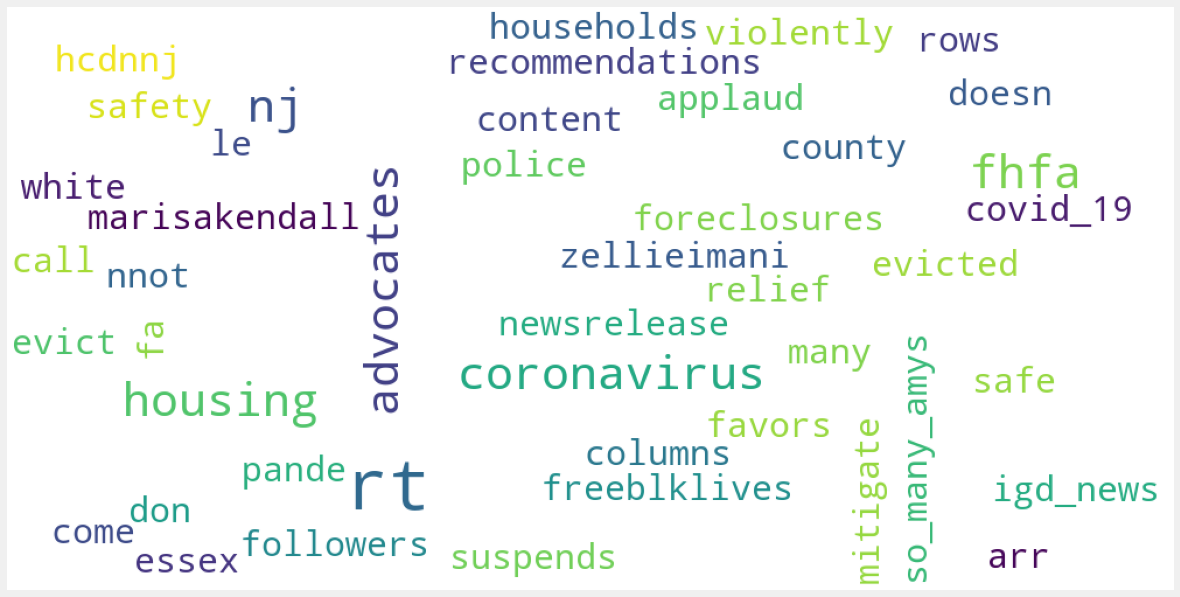

In [412]:

wordcloud = WordCloud(
                      stopwords=STOPWORDS,
                      max_font_size=60,
                      background_color='white',
                      width = 1000,
                      height = 500
                     ).generate(str(current[['content']]))
plt.figure( figsize=(20,10) )
plt.imshow(wordcloud)
plt.axis('off')
#plt.figure(figsize=(1000,1000))
plt.show()

In [413]:
#housingishealth

## Sentiment analysis on nonprofits tweets (polarity)


In [545]:
#print(''.join(open("vader_lexicon.txt").readlines()[:10]))

In [546]:
# sent = pd.read_csv('vader_lexicon.txt',sep='\t', names=['polarity','text']).reset_index()
# sent.drop(columns = ['polarity','text'], inplace = True)
# sent.rename(columns={'level_0':'token','level_1':'polarity'}, inplace = True)
# sent.set_index('token', inplace = True)
# sent

In [547]:
# punct_re = r'[^\w\s]'
# current['no_punc'] = current['content'].str.replace(punct_re,' ')


In [548]:
# tidy_format = current['no_punc'].str.split(expand = True).stack().to_frame().reset_index(level = 1)
# tidy_format.rename(columns={'level_1':'num',0:'word'}, inplace= True)
# #del tidy_format.index.name


In [549]:
# current['polarity']= tidy_format.reset_index().merge(sent, how = 'left',left_on = 'word', right_on = 'token').set_index('index').fillna(0).loc[:,['polarity']].groupby('index').sum().loc[:,'polarity']



In [550]:
# w = current[current.content.str.contains('ward')]

In [551]:

# for t in w['content']:
#     print('\n  ', t)

In [552]:
print('Most negative tweets:')
for t in current.sort_values('polarity').head(20)['content']:
    print('\n  ', t)

Most negative tweets:

   rt @govmurphy: no renters are to be threatened with eviction throughout this emergency, and under no circumstances may any landlord even at…

   from @wnyc: "eviction filings continue to pile up in new jersey's landlord-tenant courts. while the state's eviction moratorium runs through at least november, it doesn't stop landlords from initiating eviction proceedings in court."

https://t.co/dihipupyw7

   rt @igd_news: police violently evicted and arrested feminists who had occupied the human rights commission of the state of mexico earlier i…

   rt @compassionatenj: soon, renters and homeowners n nj will have no protection from evictions and foreclosures. pass #thepeoplesbill now no…

   @hudcotweet has released information about its eviction prevention program for #hudsoncounty residents facing eviction or unable to pay rent due to #covid19. 

more information can be found on the flyers, online at https://t.co/tbk69b8dco, or call 201-395-4799. https://t.co/p

In [422]:
print('Most positive tweets:')
for t in current.sort_values('polarity', ascending=False).head(20)['content']:
    print('\n  ', t)

Most positive tweets:

   safety doesn’t come with more police or foot patrols. you’re still not safe from eviction. you’re still not safe from foreclosure. you’re still not safe from losing your job. safety comes from equal access to resources and opportunities. #blacklivesmatter #justiceforjameek https://t.co/pydik5btmi

   #nnjls news - august 2020 is jam-packed with information including #covid19 and the 2020-2021 school year; @hudcotweet's eviction prevention program; and nnjls's award of a @lsctweets #probono innovation fund grant. read the entire newsletter at: https://t.co/08mppr8okk.

   rt @zellieimani: safety doesn’t come with more police or foot patrols. you’re still not safe from eviction. you’re still not safe from fore…

   @hcdnnj  awarded $1.89m to help prevent tidal wave of evictions https://t.co/ingxbbtvqg

   rt @ironboundcc: we are inviting community members to join this virtual town hall to have a chance to better understand what an eviction an…

   rt @freeblkliv

# Analyzing user tweets that has hashtags about evictions

In [496]:
evictions = pd.read_csv('evict_tweets.csv')
evictions

,Evictions,2020-09-25 19:38:00,"About 30 cars full of protesters gathered in Trenton yesterday, demanding the state Senate pass a housing relief bill to prevent evictions during the pandemic.\n\nhttps://t.co/MDJkYBdVtu\n\nvia @njdotcom",Montclair NJ,NJNewsCommons
0,Evictions,2020-09-25 11:02:00,"TODAY: Trenton approves plastic bag ban, early...",Montclair NJ,NJNewsCommons
1,Evictions,2020-09-24 18:11:04,Essex County Has Most Homeless In NJ; Eviction...,"West Orange, NJ",WestOrangePatch
2,Evictions,2020-09-24 02:59:35,I haven't been able to figure out what kind of...,"Oradell, NJ",mynameskathleen
3,Evictions,2020-09-23 23:12:54,@jmbenson1491 Didn't the President have an Exe...,"Roseland, NJ",6percentReally
4,Evictions,2020-09-18 22:03:09,@AlanRMacLeod @FAIRmediawatch It would also be...,"Montclair, NJ",saminthecan
...,...,...,...,...,...
289,Unemployment,2020-09-18 13:01:57,**Important Information**\nExtension to Unempl...,"Paterson, NJ",PatersonFreePL
290,Foreclosure,2020-09-25 23:30:47,"You gon envy someone’s car, not knowing they m...","West Orange, NJ",larebelle__
291,Displacement,2020-09-19 16:15:10,Building in a community does not automatically...,"Montclair, NJ",Shelterforce
292,foodbank,2020-09-25 14:30:01,For #Foodies Looking For Ways To Contribute To...,"Westwood, New Jersey",ScottJoughNJ


In [497]:
evictions.columns = ['hashtags','date','content','location','user']

In [498]:
evictions

,hashtags,date,content,location,user
0,Evictions,2020-09-25 11:02:00,"TODAY: Trenton approves plastic bag ban, early...",Montclair NJ,NJNewsCommons
1,Evictions,2020-09-24 18:11:04,Essex County Has Most Homeless In NJ; Eviction...,"West Orange, NJ",WestOrangePatch
2,Evictions,2020-09-24 02:59:35,I haven't been able to figure out what kind of...,"Oradell, NJ",mynameskathleen
3,Evictions,2020-09-23 23:12:54,@jmbenson1491 Didn't the President have an Exe...,"Roseland, NJ",6percentReally
4,Evictions,2020-09-18 22:03:09,@AlanRMacLeod @FAIRmediawatch It would also be...,"Montclair, NJ",saminthecan
...,...,...,...,...,...
289,Unemployment,2020-09-18 13:01:57,**Important Information**\nExtension to Unempl...,"Paterson, NJ",PatersonFreePL
290,Foreclosure,2020-09-25 23:30:47,"You gon envy someone’s car, not knowing they m...","West Orange, NJ",larebelle__
291,Displacement,2020-09-19 16:15:10,Building in a community does not automatically...,"Montclair, NJ",Shelterforce
292,foodbank,2020-09-25 14:30:01,For #Foodies Looking For Ways To Contribute To...,"Westwood, New Jersey",ScottJoughNJ


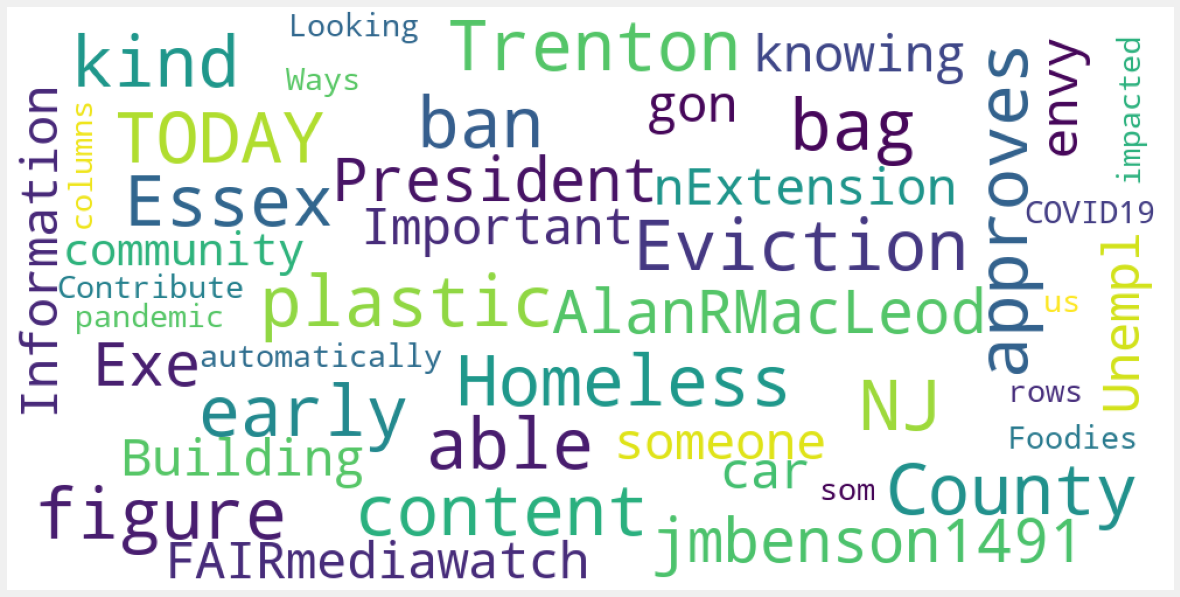

In [499]:
wordcloud = WordCloud(
                      stopwords=STOPWORDS,
                      max_font_size=60,
                      background_color='white',
                      width = 1000,
                      height = 500
                     ).generate(str(evictions[['content']]))
plt.figure( figsize=(20,10) )
plt.imshow(wordcloud)
plt.axis('off')
#plt.figure(figsize=(1000,1000))
plt.show()

In [500]:
nums = [];
for i in e:
    nums.append(isinstance(i, float))
  
any(nums)

False

In [501]:
pat = evictions.loc[evictions['location']== 'Paterson, NJ']
pat

,hashtags,date,content,location,user
16,Homeless,2020-09-25 14:30:49,@It_Aint__ME @Courtney2tall So you homeless bu...,"Paterson, NJ",apolloverdi1
18,Homeless,2020-09-25 13:31:57,Technically she’s homeless but there’s another...,"Paterson, NJ",shawny_strolls
19,Homeless,2020-09-24 23:38:26,I just gave a homeless man a coat 🧥 of mines t...,"Paterson, NJ",tonecapown
28,Homeless,2020-09-24 03:26:07,@cnceriangoddess @KellogClark Then they not on...,"Paterson, NJ",asvpjojo
33,Homeless,2020-09-23 07:53:38,After being homeless..not having my own bed or...,"Paterson, NJ",BIGGERBETTERJMP
38,Homeless,2020-09-22 19:55:00,20 minutes ago I looked homeless now my waves ...,"Paterson, NJ",Dizzy2432
46,Homeless,2020-09-19 17:05:24,If you’re always looking homeless around your ...,"Paterson, NJ",Keyani_gee
59,COVID19,2020-09-25 18:45:04,"In times of hardship, always be like Mr. Roger...","Paterson, NJ",one_paterson
110,COVID19,2020-09-23 17:50:51,"@aravosis After over 200,000 have died of #COV...","Paterson, NJ",viequesdynamo
114,COVID19,2020-09-23 16:06:56,Dr. Fauci ain’t having it! Good on him for spe...,"Paterson, NJ",HilltopHaven36


In [502]:
pat.columns = ['hashtags','date','content','location','user']

In [503]:
pat

,hashtags,date,content,location,user
16,Homeless,2020-09-25 14:30:49,@It_Aint__ME @Courtney2tall So you homeless bu...,"Paterson, NJ",apolloverdi1
18,Homeless,2020-09-25 13:31:57,Technically she’s homeless but there’s another...,"Paterson, NJ",shawny_strolls
19,Homeless,2020-09-24 23:38:26,I just gave a homeless man a coat 🧥 of mines t...,"Paterson, NJ",tonecapown
28,Homeless,2020-09-24 03:26:07,@cnceriangoddess @KellogClark Then they not on...,"Paterson, NJ",asvpjojo
33,Homeless,2020-09-23 07:53:38,After being homeless..not having my own bed or...,"Paterson, NJ",BIGGERBETTERJMP
38,Homeless,2020-09-22 19:55:00,20 minutes ago I looked homeless now my waves ...,"Paterson, NJ",Dizzy2432
46,Homeless,2020-09-19 17:05:24,If you’re always looking homeless around your ...,"Paterson, NJ",Keyani_gee
59,COVID19,2020-09-25 18:45:04,"In times of hardship, always be like Mr. Roger...","Paterson, NJ",one_paterson
110,COVID19,2020-09-23 17:50:51,"@aravosis After over 200,000 have died of #COV...","Paterson, NJ",viequesdynamo
114,COVID19,2020-09-23 16:06:56,Dr. Fauci ain’t having it! Good on him for spe...,"Paterson, NJ",HilltopHaven36


In [504]:
for t in pat['content']:
    print('\n  ', t)


   @It_Aint__ME @Courtney2tall So you homeless but you own that clean ass wood grained van https://t.co/Aofb1DiwQr

   Technically she’s homeless but there’s another word for what she’s doing, like it’s a choice for her vs no choice for others striving just to survive and it’s cringey “trendy” vs survival https://t.co/AJIZffD0A2

   I just gave a homeless man a coat 🧥 of mines that was in very good condition it’s getting cold 🥶 out here already 🙏🏾🙏🏾🙏🏾

   @cnceriangoddess @KellogClark Then they not on the same shit. West is homeless and broke unfortunately

   After being homeless..not having my own bed or room for 3 long years I done realized my potential and what I deserve ...and I can smell da fear on all you Slimey mfs dat ain’t fa me ..fear stinks 😷u should shower

   20 minutes ago I looked homeless now my waves on swim swim 😭😂😨

   If you’re always looking homeless around your man, don’t dress up, don’t do your nails etc men will start looking elsewhere and his attention will b

In [505]:
w = pat[pat.content.str.contains('ward')]
w

,hashtags,date,content,location,user


In [506]:
pat

,hashtags,date,content,location,user
16,Homeless,2020-09-25 14:30:49,@It_Aint__ME @Courtney2tall So you homeless bu...,"Paterson, NJ",apolloverdi1
18,Homeless,2020-09-25 13:31:57,Technically she’s homeless but there’s another...,"Paterson, NJ",shawny_strolls
19,Homeless,2020-09-24 23:38:26,I just gave a homeless man a coat 🧥 of mines t...,"Paterson, NJ",tonecapown
28,Homeless,2020-09-24 03:26:07,@cnceriangoddess @KellogClark Then they not on...,"Paterson, NJ",asvpjojo
33,Homeless,2020-09-23 07:53:38,After being homeless..not having my own bed or...,"Paterson, NJ",BIGGERBETTERJMP
38,Homeless,2020-09-22 19:55:00,20 minutes ago I looked homeless now my waves ...,"Paterson, NJ",Dizzy2432
46,Homeless,2020-09-19 17:05:24,If you’re always looking homeless around your ...,"Paterson, NJ",Keyani_gee
59,COVID19,2020-09-25 18:45:04,"In times of hardship, always be like Mr. Roger...","Paterson, NJ",one_paterson
110,COVID19,2020-09-23 17:50:51,"@aravosis After over 200,000 have died of #COV...","Paterson, NJ",viequesdynamo
114,COVID19,2020-09-23 16:06:56,Dr. Fauci ain’t having it! Good on him for spe...,"Paterson, NJ",HilltopHaven36


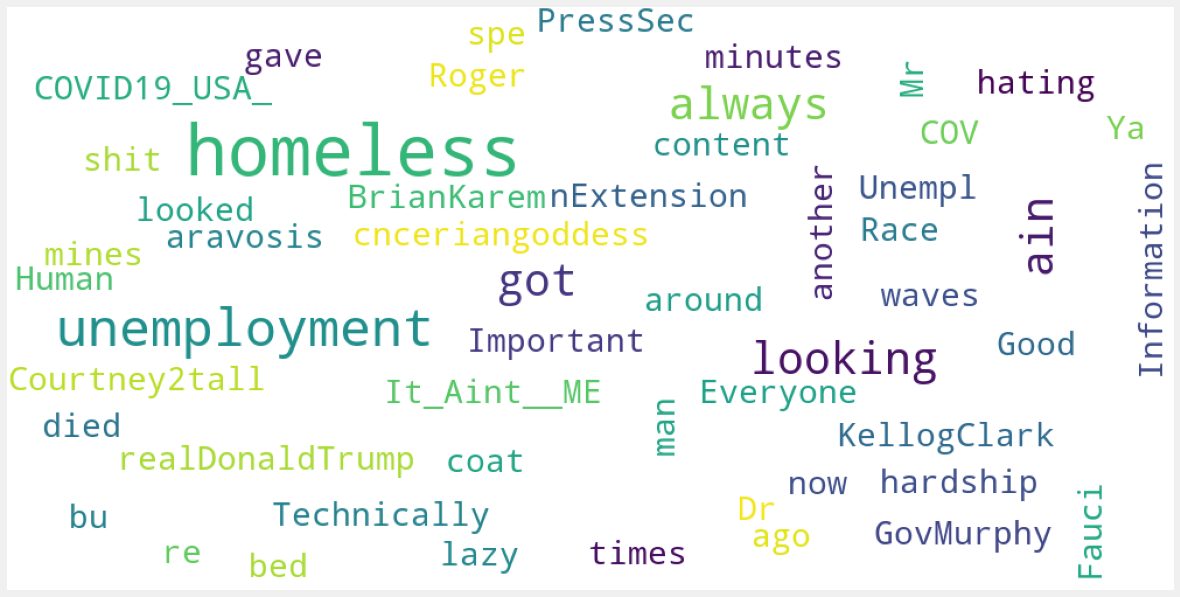

In [507]:

wordcloud = WordCloud(
                      stopwords=STOPWORDS,
                      max_font_size=60,
                      background_color='white',
                      width = 1000,
                      height = 500
                     ).generate(str(pat[['content']]))
plt.figure( figsize=(20,10) )
plt.imshow(wordcloud)
plt.axis('off')
#plt.figure(figsize=(1000,1000))
plt.show()

In [508]:
punct_re = r'[^\w\s]'
evictions['no_punc'] = evictions['content'].str.replace(punct_re,' ')


In [509]:
tidy_format = evictions['no_punc'].str.split(expand = True).stack().to_frame().reset_index(level = 1)
tidy_format.rename(columns={'level_1':'num',0:'word'}, inplace= True)
#del tidy_format.index.name
tidy_format

,num,word
0,0,TODAY
0,1,Trenton
0,2,approves
0,3,plastic
0,4,bag
...,...,...
293,47,436V5txrk6
293,48,https
293,49,t
293,50,co


In [510]:
evictions['polarity']= tidy_format.reset_index().merge(sent, how = 'left',left_on = 'word', right_on = 'token').set_index('index').fillna(0).loc[:,['polarity']].groupby('index').sum().loc[:,'polarity']
evictions

,hashtags,date,content,location,user,no_punc,polarity
0,Evictions,2020-09-25 11:02:00,"TODAY: Trenton approves plastic bag ban, early...",Montclair NJ,NJNewsCommons,TODAY Trenton approves plastic bag ban early...,-1.0
1,Evictions,2020-09-24 18:11:04,Essex County Has Most Homeless In NJ; Eviction...,"West Orange, NJ",WestOrangePatch,Essex County Has Most Homeless In NJ Eviction...,0.0
2,Evictions,2020-09-24 02:59:35,I haven't been able to figure out what kind of...,"Oradell, NJ",mynameskathleen,I haven t been able to figure out what kind of...,3.8
3,Evictions,2020-09-23 23:12:54,@jmbenson1491 Didn't the President have an Exe...,"Roseland, NJ",6percentReally,jmbenson1491 Didn t the President have an Exe...,0.0
4,Evictions,2020-09-18 22:03:09,@AlanRMacLeod @FAIRmediawatch It would also be...,"Montclair, NJ",saminthecan,AlanRMacLeod FAIRmediawatch It would also be...,-1.3
...,...,...,...,...,...,...,...
289,Unemployment,2020-09-18 13:01:57,**Important Information**\nExtension to Unempl...,"Paterson, NJ",PatersonFreePL,Important Information \nExtension to Unempl...,1.6
290,Foreclosure,2020-09-25 23:30:47,"You gon envy someone’s car, not knowing they m...","West Orange, NJ",larebelle__,You gon envy someone s car not knowing they m...,-6.2
291,Displacement,2020-09-19 16:15:10,Building in a community does not automatically...,"Montclair, NJ",Shelterforce,Building in a community does not automatically...,0.0
292,foodbank,2020-09-25 14:30:01,For #Foodies Looking For Ways To Contribute To...,"Westwood, New Jersey",ScottJoughNJ,For Foodies Looking For Ways To Contribute To...,0.0


In [511]:
evictions.location

0              Montclair NJ
1           West Orange, NJ
2               Oradell, NJ
3              Roseland, NJ
4             Montclair, NJ
               ...         
289            Paterson, NJ
290         West Orange, NJ
291           Montclair, NJ
292    Westwood, New Jersey
293     Teaneck, New Jersey
Name: location, Length: 294, dtype: object

## Analyzing polarity of user eviction tweets of cities in Passaic County

In [512]:
cities = ['Bloomingdale',
'Clifton',
'Haledon',
'Hawthorne',
'North Haledon',
'Passaic',
'Paterson',
'Pompton Lakes',
'Prospect Park',
'Ringwood',
'Singac',
'Totowa',
'Wanaque',
'Woodland Park borough']

In [517]:
evictions['passaic'] = False

In [518]:
for i in cities:
    evictions.loc[evictions.location.str.contains(i),'passaic'] = True

In [519]:
evictions

,hashtags,date,content,location,user,no_punc,polarity,passaic
0,Evictions,2020-09-25 11:02:00,"TODAY: Trenton approves plastic bag ban, early...",Montclair NJ,NJNewsCommons,TODAY Trenton approves plastic bag ban early...,-1.0,False
1,Evictions,2020-09-24 18:11:04,Essex County Has Most Homeless In NJ; Eviction...,"West Orange, NJ",WestOrangePatch,Essex County Has Most Homeless In NJ Eviction...,0.0,False
2,Evictions,2020-09-24 02:59:35,I haven't been able to figure out what kind of...,"Oradell, NJ",mynameskathleen,I haven t been able to figure out what kind of...,3.8,False
3,Evictions,2020-09-23 23:12:54,@jmbenson1491 Didn't the President have an Exe...,"Roseland, NJ",6percentReally,jmbenson1491 Didn t the President have an Exe...,0.0,False
4,Evictions,2020-09-18 22:03:09,@AlanRMacLeod @FAIRmediawatch It would also be...,"Montclair, NJ",saminthecan,AlanRMacLeod FAIRmediawatch It would also be...,-1.3,False
...,...,...,...,...,...,...,...,...
289,Unemployment,2020-09-18 13:01:57,**Important Information**\nExtension to Unempl...,"Paterson, NJ",PatersonFreePL,Important Information \nExtension to Unempl...,1.6,True
290,Foreclosure,2020-09-25 23:30:47,"You gon envy someone’s car, not knowing they m...","West Orange, NJ",larebelle__,You gon envy someone s car not knowing they m...,-6.2,False
291,Displacement,2020-09-19 16:15:10,Building in a community does not automatically...,"Montclair, NJ",Shelterforce,Building in a community does not automatically...,0.0,False
292,foodbank,2020-09-25 14:30:01,For #Foodies Looking For Ways To Contribute To...,"Westwood, New Jersey",ScottJoughNJ,For Foodies Looking For Ways To Contribute To...,0.0,False


In [529]:
pas = evictions[evictions['passaic']== True]
pas

,hashtags,date,content,location,user,no_punc,polarity,passaic
16,Homeless,2020-09-25 14:30:49,@It_Aint__ME @Courtney2tall So you homeless bu...,"Paterson, NJ",apolloverdi1,It_Aint__ME Courtney2tall So you homeless bu...,-0.8,True
18,Homeless,2020-09-25 13:31:57,Technically she’s homeless but there’s another...,"Paterson, NJ",shawny_strolls,Technically she s homeless but there s another...,0.3,True
19,Homeless,2020-09-24 23:38:26,I just gave a homeless man a coat 🧥 of mines t...,"Paterson, NJ",tonecapown,I just gave a homeless man a coat of mines t...,1.9,True
28,Homeless,2020-09-24 03:26:07,@cnceriangoddess @KellogClark Then they not on...,"Paterson, NJ",asvpjojo,cnceriangoddess KellogClark Then they not on...,-5.8,True
33,Homeless,2020-09-23 07:53:38,After being homeless..not having my own bed or...,"Paterson, NJ",BIGGERBETTERJMP,After being homeless not having my own bed or...,-5.4,True
38,Homeless,2020-09-22 19:55:00,20 minutes ago I looked homeless now my waves ...,"Paterson, NJ",Dizzy2432,20 minutes ago I looked homeless now my waves ...,0.0,True
45,Homeless,2020-09-19 19:00:00,"Homeless people are still people, and they sti...","Clifton, New Jersey",FountainMag,Homeless people are still people and they sti...,5.5,True
46,Homeless,2020-09-19 17:05:24,If you’re always looking homeless around your ...,"Paterson, NJ",Keyani_gee,If you re always looking homeless around your ...,0.8,True
59,COVID19,2020-09-25 18:45:04,"In times of hardship, always be like Mr. Roger...","Paterson, NJ",one_paterson,In times of hardship always be like Mr Roger...,3.2,True
66,COVID19,2020-09-25 15:36:13,#TrumpTrainwreck\n-The Votes Rigged\n-Vote by ...,"Clifton, NJ",Annezig,TrumpTrainwreck\n The Votes Rigged\n Vote by ...,-4.7,True


In [523]:
grouped = pas[['content','polarity','location']].groupby('location').agg({"polarity":"mean","content":most_common}).reset_index()

In [526]:
grouped

,location,polarity,content
0,"Clifton, NJ",-2.40000,"[(the, 13), (I, 13), (and, 7), (in, 6), (a, 6)..."
1,"Clifton, New Jersey",5.50000,"[(people, 2), (still, 2), (and, 2), (that, 2),..."
2,"North Haledon, NJ",-0.30000,"[(Van, 1), (Grouw, 1), (&amp;, 1), (Associates..."
3,"Paterson, NJ",-1.34375,"[(homeless, 6), (for, 6), (and, 6), (I, 6), (t..."


In [539]:
for t in grouped['content']:
    print('\n  ', t)


   [('the', 13), ('I', 13), ('and', 7), ('in', 6), ('a', 6), ('no', 5), ('for', 5), ('my', 5), ('of', 4), ('to', 4), ('got', 4), ('up', 4), ('union', 4), ('COVID19', 3), ('is', 3), ('haven’t', 3), ('worked', 3), ('paid', 3), ('it', 3), ('been', 3), ('months', 3), ('unemployment', 3), ('states', 2), ('how', 2), ('UPDATES', 2), ('IN', 2), ('THE', 2), ('BESIEGED', 2), ('GAZA', 2), ('STRIP', 2)]

   [('people', 2), ('still', 2), ('and', 2), ('that', 2), ('we', 2), ('a', 2), ('Homeless', 1), ('are', 1), ('people,', 1), ('they', 1), ('deserve', 1), ('dignity', 1), ('respect.', 1), ('The', 1), ('way', 1), ('treat', 1), ("don't", 1), ('know,', 1), ('even', 1), ('if', 1), ('just', 1), ('for', 1), ('moment,', 1), ('may', 1), ('have', 1), ('lasting', 1), ('impact', 1), ('on', 1), ('them.', 1), ('https://t.co/lPaPwnCtDz', 1)]

   [('Van', 1), ('Grouw', 1), ('&amp;', 1), ('Associates', 1), ('discusses', 1), ('unemployment', 1), ('benefits', 1), ('and', 1), ('taxes', 1), ('in', 1), ('our', 1), ('ne

In [537]:
p = grouped.iloc[1:4]
p

,location,polarity,content
1,"Clifton, New Jersey",5.50000,"[(people, 2), (still, 2), (and, 2), (that, 2),..."
2,"North Haledon, NJ",-0.30000,"[(Van, 1), (Grouw, 1), (&amp;, 1), (Associates..."
3,"Paterson, NJ",-1.34375,"[(homeless, 6), (for, 6), (and, 6), (I, 6), (t..."


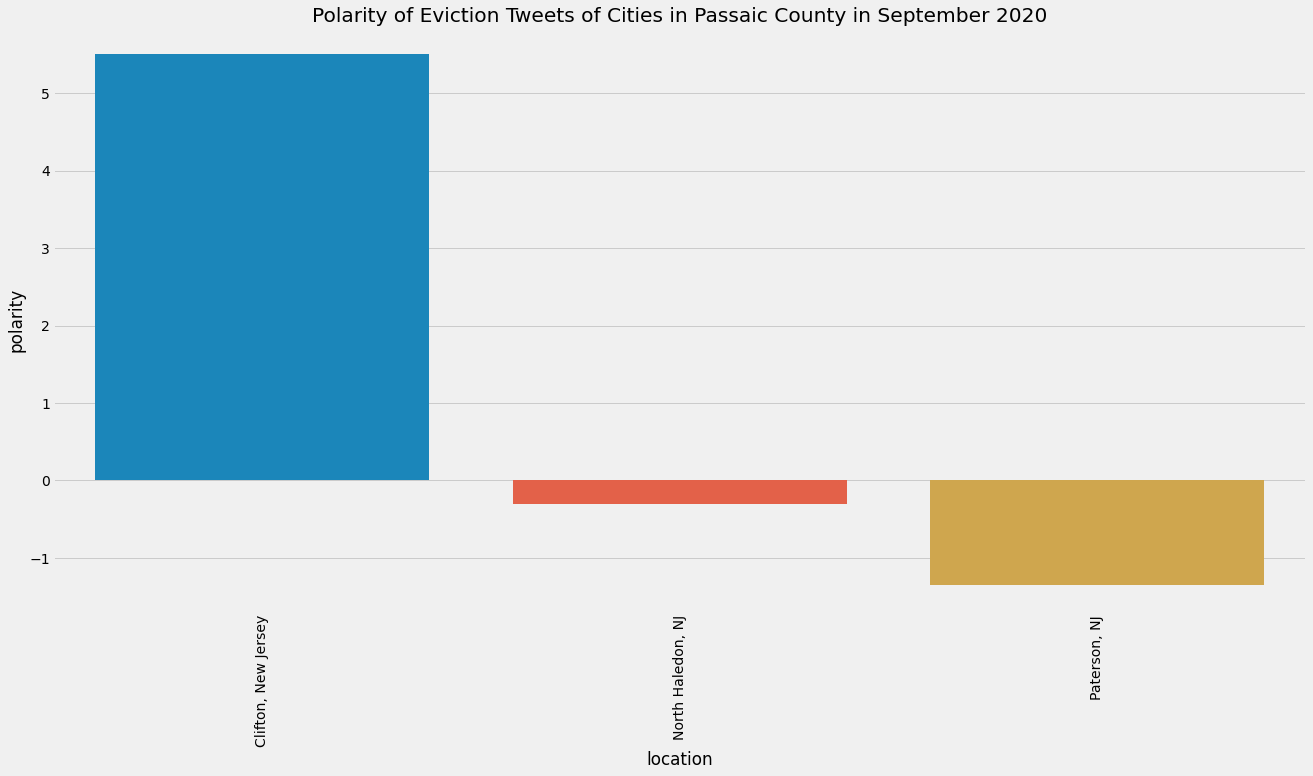

In [538]:
plt.figure( figsize=(20,10) )
sns.barplot(data = p, x = 'location', y= 'polarity')
plt.title('Polarity of Eviction Tweets of Cities in Passaic County in September 2020')
plt.xticks(rotation=90);

## Comparing polarity of user tweets in other random cities in NJ

In [540]:
g = evictions[['content','polarity','location']].groupby('location').agg({"polarity":"mean","content":most_common}).reset_index()

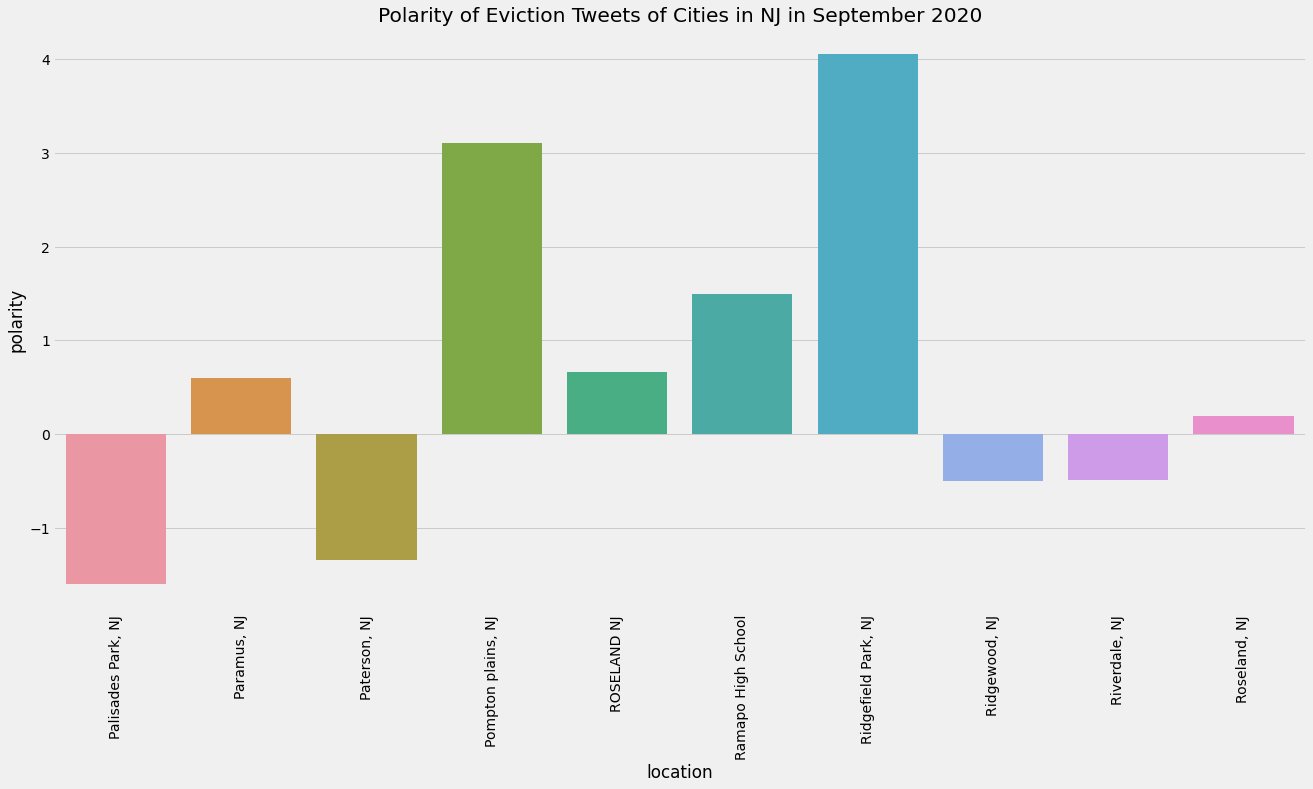

In [543]:
plt.figure( figsize=(20,10) )
sns.barplot(data = g.iloc [40:50], x = 'location', y= 'polarity')
plt.title('Polarity of Eviction Tweets of Cities in NJ in September 2020')
plt.xticks(rotation=90);